# 단순 선형회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* 당뇨병 데이터셋

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


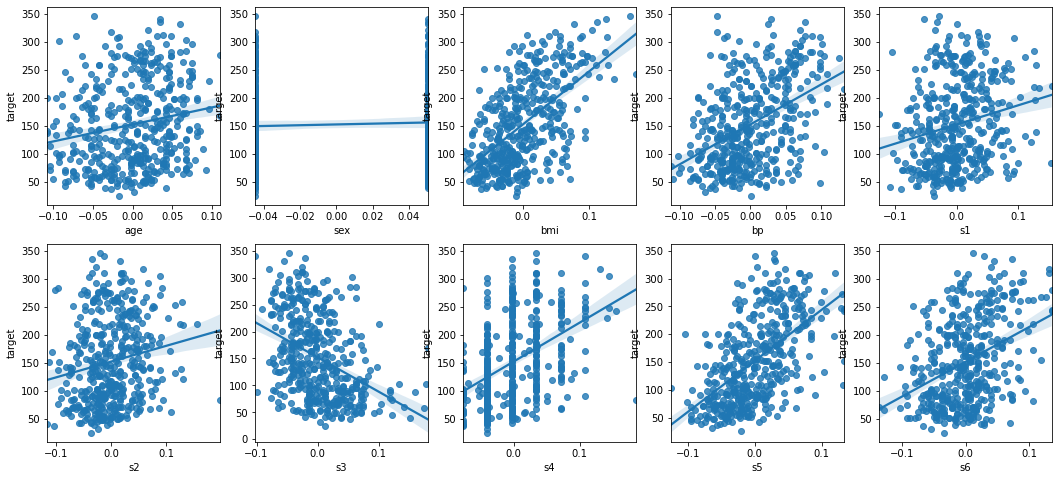

In [5]:
# y가 연속적인 값이므로 회귀를 적용한다.

import seaborn as sns
_, axs = plt.subplots(2, 5, figsize = (18, 8))
for i, feature in enumerate(df.columns[:-1]):   # 맨 끝열만 빼고 돌리겠다
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row, col])

* BMI vs target, BP vs target

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
# BMI vs target

lr.fit(df.bmi.values.reshape(-1, 1), diabetes.target)
lr.score(df.bmi.values.reshape(-1, 1), diabetes.target)

0.3439237602253803

In [8]:
# BP vs target

lr.fit(df.bp.values.reshape(-1, 1), diabetes.target)
lr.score(df.bp.values.reshape(-1, 1), diabetes.target)

0.19490798886682947

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### BMI vs target

* 훈련/테스트 데이터셋 분리(test_size = 0.1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1, 1), diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 회귀의 경우 stratify 하기가 어렵다. 클래스가 0, 1과 같이 명확하게 구분이 되지 않기 때문

((397, 1), (45, 1), (397,), (45,))

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# 계수, 절편, 잔차제곱의 합

lr.coef_, lr.intercept_, lr._residues

(array([977.81113753]), 152.28695031603942, 1559426.1877638428)

In [12]:
from sklearn.metrics import r2_score   # R-square가 r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.17874580965139086

In [13]:
lr.score(X_test, y_test)

# 결과가 같게 나온다

0.17874580965139086

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3577.1382963531237, 59.809182374892266)

* 시각화

In [15]:
y_test[0], pred[0]

(155.0, 145.16480259305965)

In [18]:
xr = np.array([-0.1, 0.2])
yr = xr * lr.coef_ + lr.intercept_
yr

array([ 54.50583656, 347.84917782])

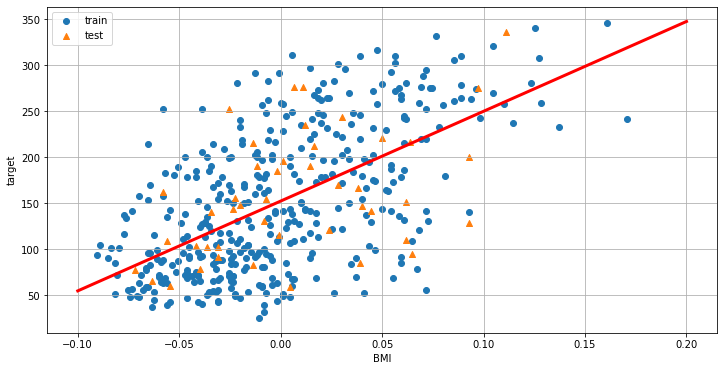

In [27]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, marker = '^', label = 'test')
plt.plot(xr, yr, 'r-', lw = 3)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.legend()
plt.show()

In [21]:
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.17874580965139086

* BP vs target

1. 훈련/테스트 데이터셋 분리

In [41]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df['bp'].values.reshape(-1, 1), df['target'].values, test_size=0.1, random_state=2021
)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((397, 1), (45, 1), (397,), (45,))

2. 훈련, 예측, 평가

In [42]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [43]:
lr2.coef_, lr2.intercept_, lr2._residues

(array([703.59565928]), 151.57015908531915, 1638377.019102043)

In [44]:
from sklearn.metrics import r2_score

pred = lr2.predict(X_test)
r2_score(y_test, pred)

0.18976615258002483

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(5303.831271789062, 72.82740742185638)

3. 시각화

In [37]:
y_test[0], pred[0]

(145.0, 128.20123110878765)

In [45]:
xr = np.array([-0.15, 0.15])
yr = xr * lr2.coef_ + lr2.intercept_
yr

array([ 46.03081019, 257.10950798])

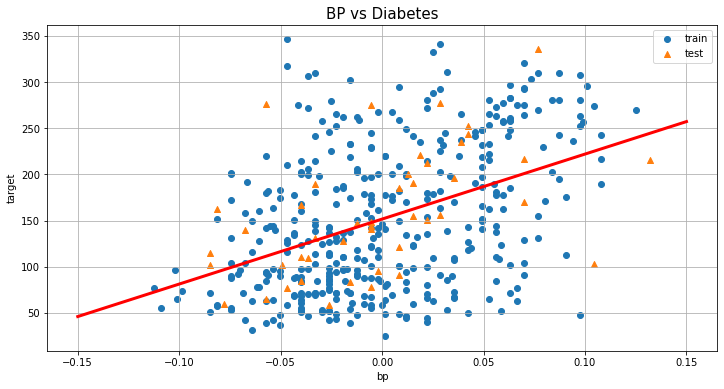

In [47]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train2, y_train2, label = 'train')
plt.scatter(X_test2, y_test2, marker = '^', label = 'test')
plt.plot(xr, yr, 'r-', lw=3)
plt.grid()
plt.xlabel('bp')
plt.ylabel('target')
plt.title('BP vs Diabetes', fontsize = 15)
plt.legend()
plt.show()